# Starbucks Customer Data
데이터 분석의 목적: 고객에게 프로모션 제안(offer)을 할 수 있는 더 좋은 방식은 무엇인가?


# 1. 라이브러리 호출

In [1]:
# numerical python. 수치 해석
import numpy as np

# DataFrame을 쉽게 다루기
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale = 1.2)
sns.set_palette("Set2")

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# plot을 새 윈도우 없이 노트북 상에서 바로 보기
%matplotlib inline

# 2. 데이터 살펴보기

## 2. 1 데이터 불러오기

In [2]:
pf = pd.read_csv('../input/starbucks-customer-data/portfolio.csv')
profile = pd.read_csv('../input/starbucks-customer-data/profile.csv')
trans = pd.read_csv('../input/starbucks-customer-data/transcript.csv')

## 2.2 데이터 확인

In [3]:
pf

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


|변수명|설명|
|-----|---|
|reward|프로모 완료에 따른 보상|
|channels|프로모를 볼 수 있는 채널|
|difficulty|프로모 완료에 필요한 최소 지출|
|duration|
|offer_type|제안 유형<br/> BOGO, 할인, 정보 제공
|id|쿠폰 id|

In [4]:
print(f'Portfolio data has {pf.shape[0]} rows and {pf.shape[1]} columns\n')
pf.info()

Portfolio data has 10 rows and 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10 non-null     int64 
 1   reward      10 non-null     int64 
 2   channels    10 non-null     object
 3   difficulty  10 non-null     int64 
 4   duration    10 non-null     int64 
 5   offer_type  10 non-null     object
 6   id          10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


In [5]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


|변수명|설명|
|-----|---|
|gender|고객 성별|
|age|고객 나이|
|id|고객 id|
|became_member_on|고객이 app id를 만든 날짜|
|income|고객의 수입|

In [6]:
print(f'Profile data has {profile.shape[0]} rows and {profile.shape[1]} columns\n')
profile.info()

Profile data has 17000 rows and 6 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


became_member_on은 날짜값이므로 datetime 자료형으로 수정하자.

In [7]:
# tpep_pickup_datetime 컬럼을 datetime 타입으로 변환
profile['became_member_on'] = pd.to_datetime(profile['became_member_on']).dt.strftime('%Y-%m-%d')

In [8]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,1970-01-01,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,1970-01-01,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,1970-01-01,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,1970-01-01,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,1970-01-01,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,1970-01-01,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,1970-01-01,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,1970-01-01,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,1970-01-01,50000.0


In [9]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  object 
 5   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 797.0+ KB


In [10]:
trans

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


|변수명|설명|
|-----|---|
|person|고객 id|
|event|기록 설명<br/>transaction: 거래, offer received: 받은 제안, offer viewed: 본 제안)|
|value|(딕셔너리 자료형) 기록에 따른 제안id 또는 거래 금액|
|time|시간 (단위: 시)|

In [11]:
print(f'Trnascription data has {trans.shape[0]} rows and {trans.shape[1]} columns\n')
trans.info()

Trnascription data has 306534 rows and 5 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  306534 non-null  int64 
 1   person      306534 non-null  object
 2   event       306534 non-null  object
 3   value       306534 non-null  object
 4   time        306534 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.7+ MB


In [12]:
# Unnamed: 0 컬럼 삭제
pf = pf.drop('Unnamed: 0', axis =1)
profile = profile.drop('Unnamed: 0', axis =1)
trans = trans.drop('Unnamed: 0', axis =1)

# 3. 결측치 삭제

위에서 확인한 info 정보에 의하면 p 컬럼의 gender, income 컬럼에만 결측치가 있다.

In [13]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [14]:
profile.isna().mean()

gender              0.127941
age                 0.000000
id                  0.000000
became_member_on    0.000000
income              0.127941
dtype: float64

두 컬럼 모두 약 2175개(12.8%)의 결측치를 포함한다. 이 비어있는 값들을 포함하는 행이 동일한 행인지 확인하자.

In [15]:
missing_gender = profile[profile['gender'].isna()]
missing_income = profile[profile['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

같은 행의 gender 정보와 income 정보가 누락되어있다.  
income은 고객 행동에 주요한 영향을 미칠 수 있는 지표이므로 결측치값은 삭제한다.

In [16]:
profile = profile.dropna()
profile.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

# 4. 중복값 확인

In [17]:
# 중복값 확인
pf[pf.duplicated()]

,reward,channels,difficulty,duration,offer_type,id


In [18]:
profile[profile.duplicated()]

,gender,age,id,became_member_on,income


In [19]:
trans[trans.duplicated()]

,person,event,value,time
66123,3dde94fa581145cb9f206624f1a94d5a,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,168
66783,e9fb6ed2cecb4980ba98c86abc9c91e3,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,168
67614,a7dc060f6fc94ca7bf71fbb188187dca,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,168
68562,30478a4c1e884a63a822aa87b833ed7a,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,168
69218,84fb57a7fe8045a8bf6236738ee73a0f,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,168
...,...,...,...,...
297625,6ba2450a438540999e633a5d99c7c7a0,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,672
299471,f39fe7ea4e5946378e6d224504b77797,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,684
304756,0785f1fce0b04ba08e01c7d2ebab4917,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,708
305551,b7e216b6472b46648272c29a52a86702,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


In [20]:
trans = trans.drop_duplicates()

# 5. 기술통계 확인

In [21]:
pf.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [22]:
variance_pf = (pf.describe().iloc[2, :] ** 2).reset_index()
variance_pf.columns = ['index', 'variance']
variance_pf

,index,variance
0,reward,12.844444
1,difficulty,34.011111
2,duration,5.388889


In [23]:
profile.describe()

,age,income
count,14825.000000,14825.000000
mean,54.393524,65404.991568
std,17.383705,21598.299410
min,18.000000,30000.000000
25%,42.000000,49000.000000
50%,55.000000,64000.000000
75%,66.000000,80000.000000
max,101.000000,120000.000000


In [24]:
variance_profile = (profile.describe().iloc[2, :] ** 2).reset_index()
variance_profile.columns = ['index', 'variance']
variance_profile

,index,variance
0,age,3.021932e+02
1,income,4.664865e+08


In [25]:
trans.describe()

,time
count,306137.000000
mean,366.185015
std,200.348174
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [26]:
variance_trans = (trans.describe().iloc[2, :] ** 2).reset_index()
variance_trans.columns = ['index', 'variance']
variance_trans

,index,variance
0,time,40139.390966


# 6. EDA, 이상치 탐지 및 처리

## 6.1 portfolio (pf)

In [27]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


### 6.1.1 numerical data

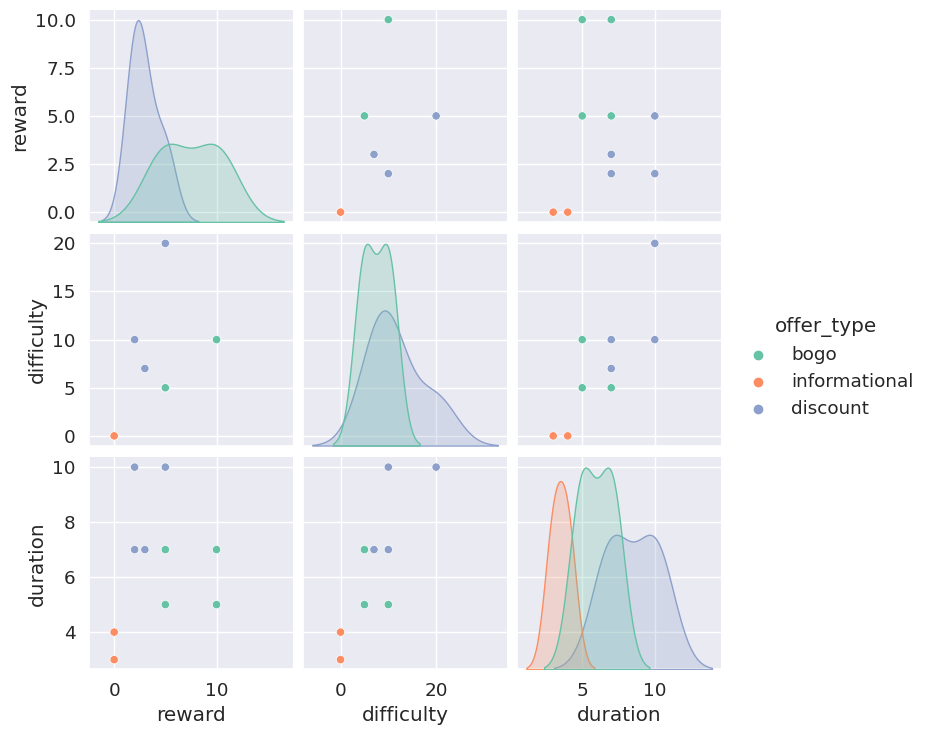

In [28]:
sns.pairplot(pf, hue = 'offer_type')
plt.show()

In [29]:
pf['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

- distount(할인) 4번, BOGO(1+1) 4번, informational 2번
- discount, BOGO, informational 순으로 duration(프로모션 지속기간)이 짧아짐.
- discount는 BOGO에 비해 difficulty는 높으나 reward가 적다.  
    = discount 프로모션에 대한 참여 조건이 더 까다로울 수 있음

#### 6.1.1.1 Pearson Correlation Coefficient

numerical data들의 상관관계를 파악할 것이다. 샘플의 수가 10개씩으로 매우 적으므로, Pearson이 아닌 Kendall 상관관계를 사용한다.

In [30]:
kendall_corr = pf[['reward', 'difficulty', 'duration']].corr(method = 'kendall')
kendall_corr

,reward,difficulty,duration
reward,1.000000,0.394874,0.184274
difficulty,0.394874,1.000000,0.702703
duration,0.184274,0.702703,1.000000


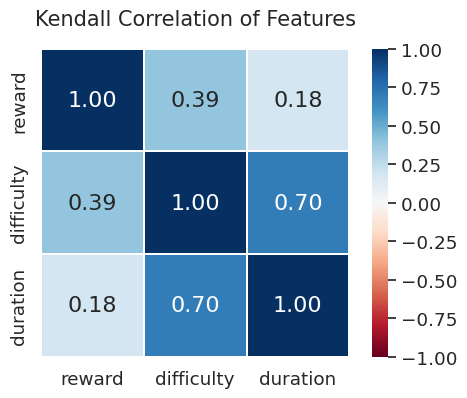

In [31]:
colormap = plt.cm.RdBu
plt.figure(figsize = (6, 4))
plt.title('Kendall Correlation of Features', y = 1.05, size = 15)
sns.heatmap(kendall_corr.astype(float), linewidths = 0.1, vmax = 1.0, vmin = -1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {'size': 16}, fmt = '.2f');

- difficulty와 duration은 강한 양의 상관관계를 갖는다.  
    = 프로모션을 완료하기 위한 최소 지출이 클수록 프로모션 지속 기간이 길어진다.
- difficulty와 reward는 약한 양의 상관관계를 갖는다.  
    = 지출에 비해 보상이 다소 적은 경향이 있다.
- reward와 duration은 상대적으로 매우 약한 양의 상관관계를 갖는다.  
    = 보상과 프로모션 지속 기관은 큰 연관이 없다.

### 6.1.2 categorical data

#### 6.1.2.1 Channels

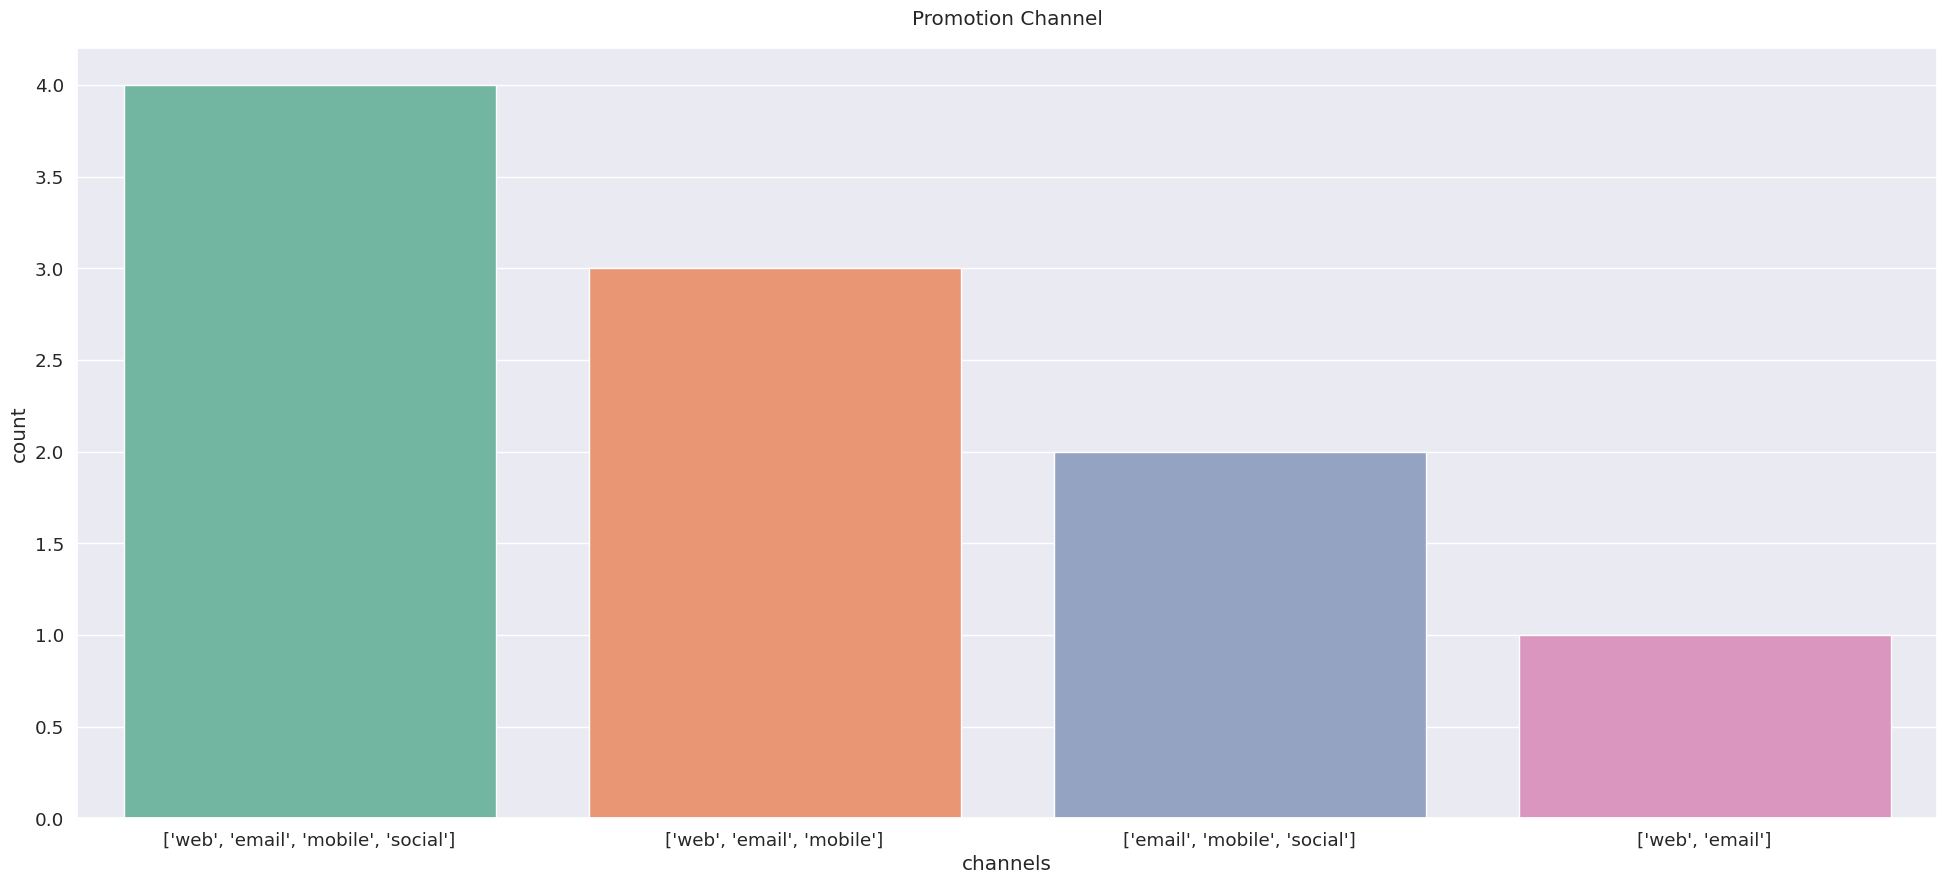

In [32]:
channel_counts = pf['channels'].value_counts(ascending = False)
order = channel_counts.index

f, ax = plt.subplots(1, 1, figsize = (24, 10))

sns.countplot(x = 'channels', data = pf, order = order, ax = ax)
ax.set_title('Promotion Channel', y = 1.02);

- 모든 채널을 사용한 4개의 프로모션 제안
- 소셜 미디어(social)를 제외한 모든 채널을 사용한 3개의 프로모션 제안  
    = 소셜 미디어의 프로모션 효과는 이러한 제안과 모든 채널을 사용하는 제안 간의 특정 형태의 비교에서 추출될 수 있음
- 웹사이트(web)을 제외한 모든 채널을 사용한 2개의 프로모션 제안  
    = 웹사이트의 프로모션 효과는 이러한 제안과 첫 번째 그룹의 비교를 통해 추출할 수 있음
- 웹사이트와 이메일 채널만 사용한 1개의 프로모션 제안  
    = 모바일 앱의 프로모션 효과는 이러한 제안과 두 번째 그룹의 비교를 통해 추출할 수 있음.  
    = 다른 비교를 통해 웹사이트의 효과를 도출할 수 있으므로, 이메일의 홍보효과도 추출할 수 있음.

## 6.2 Profile

In [33]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  object 
 4   income            14825 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 694.9+ KB


In [34]:
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,1970-01-01,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,1970-01-01,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,1970-01-01,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,1970-01-01,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,1970-01-01,51000.0


### 6.2.1 Numerical data

#### 6.2.1.1 Age, Income

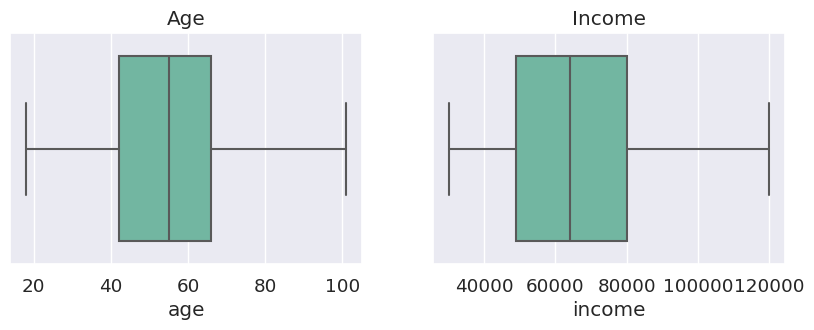

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

In [48]:
f, ax = plt.subplots(1, 2, figsize = (10, 3))


plt.figure(figsize=(8, 4))
sns.boxplot(x='age', data=profile, ax = ax[0])
ax[0].set_title('Age')

plt.figure(figsize=(8, 4))
sns.boxplot(x='income', data=profile, ax = ax[1])
ax[1].set_title('Income')
plt.show()

In [49]:
profile[['age', 'income']].describe()

,age,income
count,14825.000000,14825.000000
mean,54.393524,65404.991568
std,17.383705,21598.299410
min,18.000000,30000.000000
25%,42.000000,49000.000000
50%,55.000000,64000.000000
75%,66.000000,80000.000000
max,101.000000,120000.000000


#### 6.2.1.3 Age vs Income

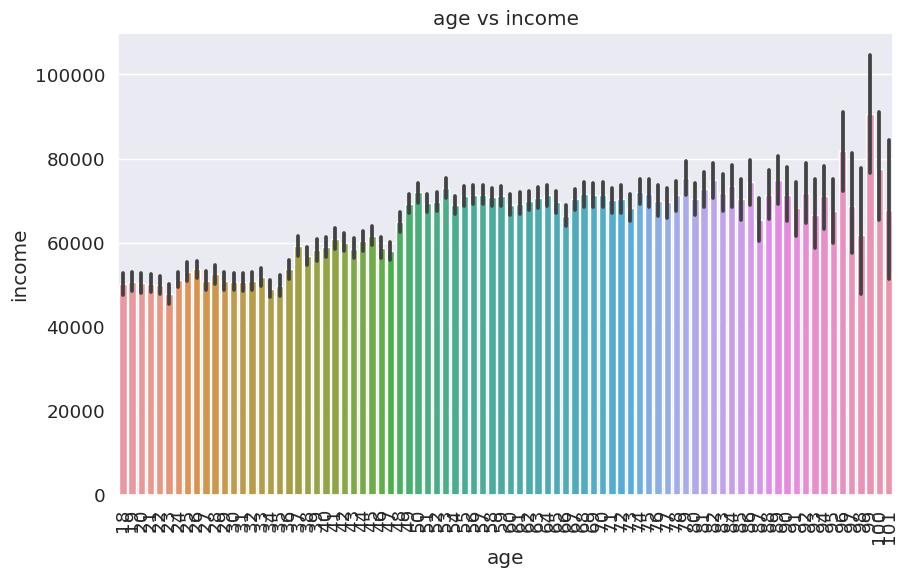

In [50]:
plt.figure(figsize = (10, 6))
sns.barplot(data = profile, x = 'age', y = 'income')
plt.title('age vs income')
plt.xlabel('age')
plt.ylabel('income')
plt.xticks(rotation = 90)
plt.show()

age와 income은 일반적으로 양의 상관관계가 있다.

### 6.2.2 Categorical data

#### 6.2.2.1 Gender

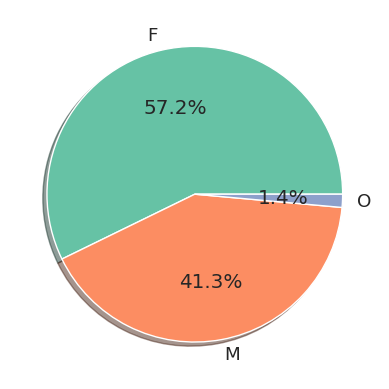

In [53]:
channel_counts = profile['gender'].value_counts(ascending = False)
order = channel_counts.index

plt.pie(x = profile['gender'].value_counts(), labels = profile['gender'].unique(), autopct = '%1.1f%%', shadow = True);

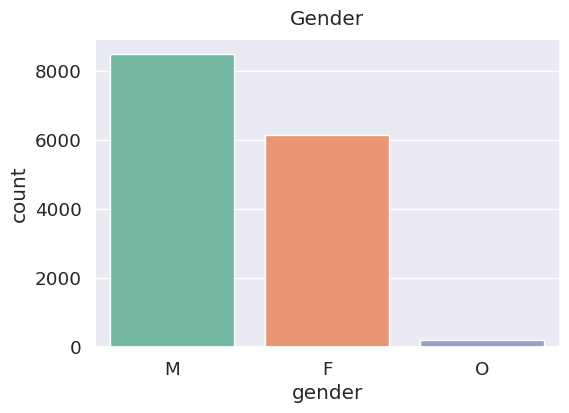

In [54]:
f, ax = plt.subplots(1, 1, figsize = (6, 4))
sns.countplot(x = 'gender', data = profile, order = order, ax = ax)
ax.set_title('Gender', y = 1.02);

#### 6.2.2.2 became_member_on